## AIM:

To find relationship between TV, Radio & Newspaper Advertisemnts and Sales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

## Import Data

In [6]:
data = pd.read_csv("Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Data Preprocessing

In [8]:
# Removing unwanted column

data.drop(columns="Unnamed: 0", inplace=True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
# Exploring first five rows

data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
# Exoploring last five rows

data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [12]:
# Exploring random 15 rows

data.sample(15)

,TV,Radio,Newspaper,Sales
4,180.8,10.8,58.4,12.9
130,0.7,39.6,8.7,1.6
123,123.1,34.6,12.4,15.2
111,241.7,38.0,23.2,21.8
76,27.5,1.6,20.7,6.9
37,74.7,49.4,45.7,14.7
88,88.3,25.5,73.4,12.9
143,104.6,5.7,34.4,10.4
80,76.4,26.7,22.3,11.8
148,38.0,40.3,11.9,10.9


In [13]:
# Getting shape 

data.shape

(200, 4)

In [15]:
# Getting columns

data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [16]:
# Exploring data into columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [47]:
# Getting Summary Statistics

data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.04,85.85,0.7,74.38,149.75,218.82,296.4
Radio,200.0,23.26,14.85,0.0,9.98,22.90,36.52,49.6
Newspaper,200.0,30.55,21.78,0.3,12.75,25.75,45.10,114.0
Sales,200.0,14.02,5.22,1.6,10.38,12.90,17.40,27.0


In [17]:
# Finding missing data

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Scatter plot 

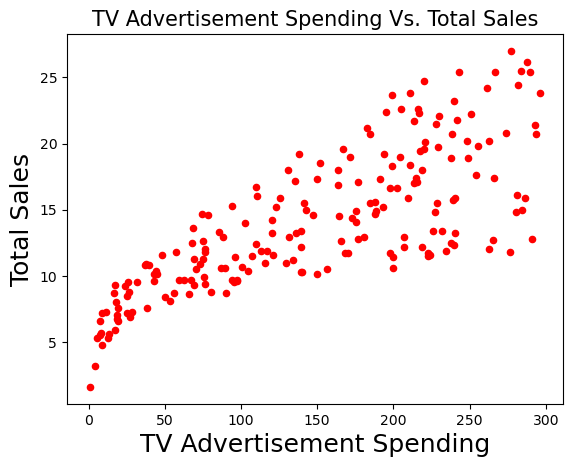

In [24]:
plt.scatter(data['TV'],
            data['Sales'],
            color="red",
            marker="o",
           s=20)

plt.xlabel("TV Advertisement Spending",size=18)
plt.ylabel("Total Sales",size=18)
plt.title("TV Advertisement Spending Vs. Total Sales", size=15)
plt.show()

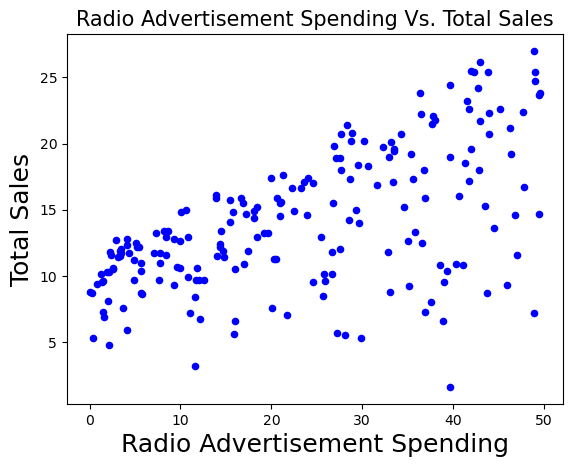

In [25]:
plt.scatter(data['Radio'],
            data['Sales'],
            color="blue",
            marker="o",
           s=20)

plt.xlabel("Radio Advertisement Spending",size=18)
plt.ylabel("Total Sales",size=18)
plt.title("Radio Advertisement Spending Vs. Total Sales", size=15)
plt.show()

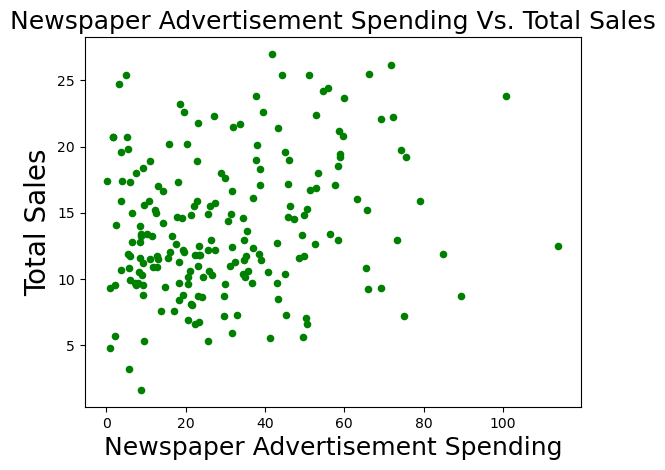

In [26]:
plt.scatter(data['Newspaper'],
            data['Sales'],
            color="green",
            marker="o",
           s=20)

plt.xlabel("Newspaper Advertisement Spending",size=18)
plt.ylabel("Total Sales",size=20)
plt.title("Newspaper Advertisement Spending Vs. Total Sales", size=18)
plt.show()

In [28]:
# Extracting Feature Array and Target Column

X = data[['TV']]  # Independent variable/Feature/Predictor
y = data['Sales'] # Dependent variable/Target

In [30]:
# Splitting dataset into Training and Testing Sets

SEED = 42

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=SEED)

print(X_train)

        TV
114   78.2
173  168.4
5      8.7
126    7.8
117   76.4
..     ...
106   25.0
14   204.1
92   217.7
179  165.6
102  280.2

[150 rows x 1 columns]


## LInear Regression

In [31]:
model = LinearRegression()

model.fit(X_train,y_train)
model

LinearRegression()

In [32]:
# Printing coeficient and y-intercetp

print("Slope: ", model.coef_)
print("Intercept: ", model.intercept_)

Slope:  [0.04689446]
Intercept:  7.13178450668533


## Making Predictions

In [37]:
y_pred = model.predict(X_test)

# converting into Pandas Series
y_pred = pd.Series(y_pred)
y_pred[:5]

0    14.789649
1    16.294961
2    20.867171
3     7.680450
4    17.462633
dtype: float64

In [38]:
# Checking types of actual sales and predicted sales

print("Actual Sales",type(y_test))
print("Predicted Sales",type(y_pred))

Actual Sales <class 'pandas.core.series.Series'>
Predicted Sales <class 'pandas.core.series.Series'>


In [45]:
# Creating a dataframe to compare actual sales with predicted sales

data_act_pred = pd.DataFrame(zip(y_test,y_pred), columns=['Actual Sales','Predicted Sales'])

data_act_pred['Model_Error'] = data_act_pred['Actual Sales'] - data_act_pred['Predicted Sales']

data_act_pred[:10]

,Actual Sales,Predicted Sales,Model_Error
0,16.9,14.789649,2.110351
1,22.4,16.294961,6.105039
2,21.4,20.867171,0.532829
3,7.3,7.680450,-0.380450
4,24.7,17.462633,7.237367
5,12.6,10.653558,1.946442
6,22.3,17.298503,5.001497
7,8.4,9.476507,-1.076507
8,11.5,17.561111,-6.061111
9,14.9,15.343004,-0.443004


In [46]:
# Checking Accuracy of the Model

model.score(X_test,y_test)

0.6606120390330493